# Observations
1. Tempertures are warmer in the southern hemisphere compared to the nothern hemisphere because it is summer in the southern hemisphere and winter in the northern hemisphere; and there are more cities providing data in the northern hemisphere than in the southern hemisphere
2. There is slightly more variance in humidity toward the poles than at the central latitudes where humidity is consistently higher than cities closer to the poles
3. There are greater variances and higher averages in wind speeds near the poles compared to the central latitudes

In [25]:
# Load libraries
import pandas as pd
import numpy as py
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pyowm
import random
from citipy import citipy
import time
import datetime

In [9]:
# Generate and fill city data frame
owm = pyowm.OWM('9b8e40a042d975a62df625789845244d')

#initialize variables
latitude=-90
longitude=-180
# Iterate the globe in 5 degree increments for even geographic distribution
incrementer=5
index=0
outputfilename='city_weather.csv'

citycolumns = ['index','latitude', 'longitude', 'cityname','searchcity','temp','humidity','cloudiness','windspeed']
cityframe = pd.DataFrame(columns=citycolumns)
citycount=0
cityname=""
reg = owm.city_id_registry()


while latitude <= 90:
    while longitude <= 180:
        # Find nearest city to coordinates
        city=citipy.nearest_city(latitude,longitude)
        cityname=city.city_name
        countrycode=city.country_code
        countrycode=countrycode.upper()
        cityfound = reg.ids_for(cityname, country=countrycode) 
        existingcity=cityframe.loc[cityframe['searchcity'] == cityname]

        # If not a duplicate city, look up weather and add to the frame
        if existingcity.empty and cityfound:
            citycount=citycount+1
            place=cityname+','+countrycode
            cityid=cityfound[0][0]
            observation=owm.weather_at_id(cityid)
            location=observation.get_location()
            weather = observation.get_weather()
            cityframe.at[index,'index']=index
            cityframe.at[index,'latitude']=location.get_lat()
            cityframe.at[index,'longitude']=location.get_lon()
            cityframe.at[index,'cityname']=location.get_name()
            cityframe.at[index,'searchcity']=cityname
            temperatures=weather.get_temperature('fahrenheit')
            temp=temperatures['temp_max']
            humidity=weather.get_humidity()
            cloudiness=weather.get_clouds()
            winds=weather.get_wind()
            windspeed=winds['speed']
            cityframe.at[index,'temp']=temp
            cityframe.at[index,'humidity']=humidity
            cityframe.at[index,'cloudiness']=cloudiness
            cityframe.at[index,'windspeed']=windspeed
            print(citycount,location)
            index=index+1

        longitude=longitude+incrementer
    
    latitude=latitude+incrementer
    longitude=-180

# Output to csv
cityframe.to_csv(outputfilename)

1 <pyowm.webapi25.location.Location - id=4032243, name=Vaini, lon=-175.2, lat=-21.2>
2 <pyowm.webapi25.location.Location - id=4030556, name=Rikitea, lon=-134.97, lat=-23.12>
3 <pyowm.webapi25.location.Location - id=3874787, name=Punta Arenas, lon=-70.92, lat=-53.15>
4 <pyowm.webapi25.location.Location - id=3833367, name=Ushuaia, lon=-68.3, lat=-54.8>
5 <pyowm.webapi25.location.Location - id=3366880, name=Hermanus, lon=19.23, lat=-34.42>
6 <pyowm.webapi25.location.Location - id=1015776, name=Bredasdorp, lon=20.04, lat=-34.53>
7 <pyowm.webapi25.location.Location - id=986717, name=Kruisfontein, lon=24.73, lat=-34.0>
8 <pyowm.webapi25.location.Location - id=964420, name=Port Elizabeth, lon=25.57, lat=-33.92>
9 <pyowm.webapi25.location.Location - id=964432, name=Port Alfred, lon=26.89, lat=-33.59>
10 <pyowm.webapi25.location.Location - id=1006984, name=East London, lon=27.91, lat=-33.02>
11 <pyowm.webapi25.location.Location - id=2075265, name=Busselton, lon=115.33, lat=-33.65>
12 <pyowm.web

92 <pyowm.webapi25.location.Location - id=6355222, name=Yulara, lon=130.99, lat=-25.24>
93 <pyowm.webapi25.location.Location - id=2173911, name=Broken Hill, lon=141.43, lat=-31.95>
94 <pyowm.webapi25.location.Location - id=2155742, name=Narrabri, lon=149.78, lat=-30.32>
95 <pyowm.webapi25.location.Location - id=2177069, name=Ballina, lon=153.57, lat=-28.87>
96 <pyowm.webapi25.location.Location - id=2172880, name=Byron Bay, lon=153.62, lat=-28.65>
97 <pyowm.webapi25.location.Location - id=2137773, name=Vao, lon=167.48, lat=-22.67>
98 <pyowm.webapi25.location.Location - id=2189343, name=Kaeo, lon=173.78, lat=-35.1>
99 <pyowm.webapi25.location.Location - id=4036284, name=Alofi, lon=-169.92, lat=-19.06>
100 <pyowm.webapi25.location.Location - id=3652764, name=Puerto Ayora, lon=-90.35, lat=-0.74>
101 <pyowm.webapi25.location.Location - id=3932145, name=Pisco, lon=-76.22, lat=-13.7>
102 <pyowm.webapi25.location.Location - id=3870243, name=Taltal, lon=-70.48, lat=-25.4>
103 <pyowm.webapi25.lo

183 <pyowm.webapi25.location.Location - id=2132606, name=Samarai, lon=150.67, lat=-10.62>
184 <pyowm.webapi25.location.Location - id=2178753, name=Kirakira, lon=161.92, lat=-10.45>
185 <pyowm.webapi25.location.Location - id=2136150, name=Luganville, lon=167.17, lat=-15.53>
186 <pyowm.webapi25.location.Location - id=2134814, name=Sola, lon=167.55, lat=-13.88>
187 <pyowm.webapi25.location.Location - id=3651949, name=San Cristobal, lon=-89.62, lat=-0.9>
188 <pyowm.webapi25.location.Location - id=3693584, name=Pimentel, lon=-79.93, lat=-6.84>
189 <pyowm.webapi25.location.Location - id=3698304, name=Chimbote, lon=-78.58, lat=-9.09>
190 <pyowm.webapi25.location.Location - id=3933874, name=Oxapampa, lon=-75.4, lat=-10.58>
191 <pyowm.webapi25.location.Location - id=3663495, name=Manoel Urbano, lon=-69.26, lat=-8.84>
192 <pyowm.webapi25.location.Location - id=3665202, name=Aripuana, lon=-60.63, lat=-9.17>
193 <pyowm.webapi25.location.Location - id=6316343, name=Alta Floresta, lon=-56.09, lat=-9

276 <pyowm.webapi25.location.Location - id=1213855, name=Sibolga, lon=98.78, lat=1.74>
277 <pyowm.webapi25.location.Location - id=1631905, name=Payakumbuh, lon=100.63, lat=-0.22>
278 <pyowm.webapi25.location.Location - id=1640044, name=Kijang, lon=104.63, lat=0.9>
279 <pyowm.webapi25.location.Location - id=1630789, name=Pontianak, lon=109.33, lat=-0.03>
280 <pyowm.webapi25.location.Location - id=1637510, name=Loa Janan, lon=117.09, lat=-0.58>
281 <pyowm.webapi25.location.Location - id=1633034, name=Palu, lon=119.87, lat=-0.89>
282 <pyowm.webapi25.location.Location - id=1623424, name=Tondano, lon=124.91, lat=1.3>
283 <pyowm.webapi25.location.Location - id=1626542, name=Sorong, lon=131.25, lat=-0.88>
284 <pyowm.webapi25.location.Location - id=1636308, name=Manokwari, lon=134.08, lat=-0.87>
285 <pyowm.webapi25.location.Location - id=2084442, name=Vanimo, lon=141.3, lat=-2.67>
286 <pyowm.webapi25.location.Location - id=2092164, name=Lorengau, lon=147.27, lat=-2.02>
287 <pyowm.webapi25.loca

369 <pyowm.webapi25.location.Location - id=3374083, name=Bathsheba, lon=-59.52, lat=13.22>
370 <pyowm.webapi25.location.Location - id=3374346, name=Ponta do Sol, lon=-25.09, lat=17.2>
371 <pyowm.webapi25.location.Location - id=3374336, name=Porto Novo, lon=-25.06, lat=17.02>
372 <pyowm.webapi25.location.Location - id=2253354, name=Dakar, lon=-17.44, lat=14.69>
373 <pyowm.webapi25.location.Location - id=2449938, name=Tenenkou, lon=-4.92, lat=14.46>
374 <pyowm.webapi25.location.Location - id=2439374, name=Tahoua, lon=5.5, lat=16.0>
375 <pyowm.webapi25.location.Location - id=2444219, name=Goure, lon=10.27, lat=13.98>
376 <pyowm.webapi25.location.Location - id=2428394, name=Mao, lon=15.31, lat=14.12>
377 <pyowm.webapi25.location.Location - id=244878, name=Biltine, lon=20.92, lat=14.53>
378 <pyowm.webapi25.location.Location - id=371745, name=Kutum, lon=24.67, lat=14.2>
379 <pyowm.webapi25.location.Location - id=372753, name=Kassala, lon=36.4, lat=15.45>
380 <pyowm.webapi25.location.Location

462 <pyowm.webapi25.location.Location - id=2112802, name=Hasaki, lon=140.83, lat=35.73>
463 <pyowm.webapi25.location.Location - id=5856516, name=Ahuimanu, lon=-157.84, lat=21.44>
464 <pyowm.webapi25.location.Location - id=5354943, name=Half Moon Bay, lon=-122.43, lat=37.46>
465 <pyowm.webapi25.location.Location - id=5380437, name=Pacific Grove, lon=-121.92, lat=36.62>
466 <pyowm.webapi25.location.Location - id=3988392, name=Rosarito, lon=-117.03, lat=32.33>
467 <pyowm.webapi25.location.Location - id=3987224, name=San Felipe, lon=-114.87, lat=31.0>
468 <pyowm.webapi25.location.Location - id=4012143, name=Cumpas, lon=-109.78, lat=29.98>
469 <pyowm.webapi25.location.Location - id=3994469, name=Ojinaga, lon=-104.42, lat=29.57>
470 <pyowm.webapi25.location.Location - id=4738721, name=Uvalde, lon=-99.79, lat=29.21>
471 <pyowm.webapi25.location.Location - id=4671524, name=Atascocita, lon=-95.18, lat=30.0>
472 <pyowm.webapi25.location.Location - id=4319518, name=Chalmette, lon=-89.96, lat=29.9

554 <pyowm.webapi25.location.Location - id=3372745, name=Rabo de Peixe, lon=-25.58, lat=37.8>
555 <pyowm.webapi25.location.Location - id=2264923, name=Peniche, lon=-9.38, lat=39.36>
556 <pyowm.webapi25.location.Location - id=2510693, name=Talavera de la Reina, lon=-4.83, lat=39.96>
557 <pyowm.webapi25.location.Location - id=2520709, name=Burriana, lon=-0.09, lat=39.89>
558 <pyowm.webapi25.location.Location - id=2522890, name=Tortoli, lon=9.66, lat=39.93>
559 <pyowm.webapi25.location.Location - id=3183412, name=Agropoli, lon=15.0, lat=40.35>
560 <pyowm.webapi25.location.Location - id=363383, name=Delvine, lon=20.1, lat=39.95>
561 <pyowm.webapi25.location.Location - id=320557, name=Bozuyuk, lon=30.04, lat=39.91>
562 <pyowm.webapi25.location.Location - id=752278, name=Alaca, lon=34.84, lat=40.17>
563 <pyowm.webapi25.location.Location - id=750938, name=Bayburt, lon=40.23, lat=40.26>
564 <pyowm.webapi25.location.Location - id=174704, name=Zangakatun, lon=45.04, lat=39.82>
565 <pyowm.webapi2

646 <pyowm.webapi25.location.Location - id=7533001, name=Wieliczka, lon=20.05, lat=49.99>
647 <pyowm.webapi25.location.Location - id=711416, name=Brody, lon=25.15, lat=50.09>
648 <pyowm.webapi25.location.Location - id=709248, name=Fastiv, lon=29.92, lat=50.08>
649 <pyowm.webapi25.location.Location - id=713749, name=Okhtyrka, lon=34.9, lat=50.31>
650 <pyowm.webapi25.location.Location - id=526083, name=Mitrofanovka, lon=39.69, lat=49.97>
651 <pyowm.webapi25.location.Location - id=509826, name=Petrov Val, lon=45.21, lat=50.14>
652 <pyowm.webapi25.location.Location - id=513328, name=Ozinki, lon=49.73, lat=51.2>
653 <pyowm.webapi25.location.Location - id=491019, name=Sol-Iletsk, lon=54.99, lat=51.16>
654 <pyowm.webapi25.location.Location - id=565407, name=Dombarovskiy, lon=59.54, lat=50.76>
655 <pyowm.webapi25.location.Location - id=1524606, name=Derzhavinsk, lon=66.32, lat=51.1>
656 <pyowm.webapi25.location.Location - id=1526273, name=Astana, lon=71.45, lat=51.18>
657 <pyowm.webapi25.locat

737 <pyowm.webapi25.location.Location - id=544318, name=Kosa, lon=55.0, lat=59.94>
738 <pyowm.webapi25.location.Location - id=1486984, name=Volchansk, lon=60.08, lat=59.94>
739 <pyowm.webapi25.location.Location - id=1488429, name=Uray, lon=64.78, lat=60.12>
740 <pyowm.webapi25.location.Location - id=1506268, name=Gornopravdinsk, lon=69.9, lat=60.05>
741 <pyowm.webapi25.location.Location - id=1500399, name=Lokosovo, lon=74.82, lat=61.13>
742 <pyowm.webapi25.location.Location - id=1504382, name=Kargasok, lon=80.86, lat=59.06>
743 <pyowm.webapi25.location.Location - id=1510370, name=Belyy Yar, lon=85.04, lat=58.44>
744 <pyowm.webapi25.location.Location - id=1489656, name=Teya, lon=92.63, lat=60.38>
745 <pyowm.webapi25.location.Location - id=1503037, name=Kodinsk, lon=99.18, lat=58.69>
746 <pyowm.webapi25.location.Location - id=2013727, name=Vanavara, lon=102.28, lat=60.34>
747 <pyowm.webapi25.location.Location - id=2012956, name=Yerbogachen, lon=108.01, lat=61.28>
748 <pyowm.webapi25.loca

829 <pyowm.webapi25.location.Location - id=3421719, name=Narsaq, lon=-46.05, lat=60.92>
830 <pyowm.webapi25.location.Location - id=777682, name=Skjervoy, lon=20.97, lat=70.03>
831 <pyowm.webapi25.location.Location - id=779622, name=Havoysund, lon=24.66, lat=71.0>
832 <pyowm.webapi25.location.Location - id=780687, name=Berlevag, lon=29.09, lat=70.86>
833 <pyowm.webapi25.location.Location - id=1507390, name=Dikson, lon=80.55, lat=73.51>
834 <pyowm.webapi25.location.Location - id=2729907, name=Longyearbyen, lon=15.64, lat=78.22>
835 <pyowm.webapi25.location.Location - id=777019, name=Vardo, lon=31.11, lat=70.37>
836 <pyowm.webapi25.location.Location - id=778707, name=Mehamn, lon=27.85, lat=71.04>


In [15]:
cityframe.head()

,index,latitude,longitude,cityname,searchcity,temp,humidity,cloudiness,windspeed
0,0,-21.2,-175.2,Vaini,vaini,82.4,78,90,1.5
1,1,-23.12,-134.97,Rikitea,rikitea,77.99,100,56,7.93
2,2,-53.15,-70.92,Punta Arenas,punta arenas,46.4,61,90,7.2
3,3,-54.8,-68.3,Ushuaia,ushuaia,42.8,75,75,11.8
4,4,-34.42,19.23,Hermanus,hermanus,61.52,79,0,2.18


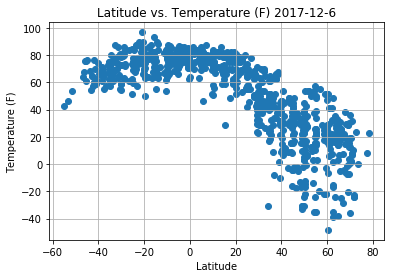

In [30]:
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
now = datetime.datetime.now()
str(now)
title="Latitude vs. Temperature (F) "+str(now.year)+"-"+str(now.month)+"-"+str(now.day)
plt.title(title)
plt.scatter(cityframe['latitude'],cityframe['temp'])
plt.grid(True)
fig1=plt.gcf()
plt.show()
fig1.savefig('lat_vs_temp.png')

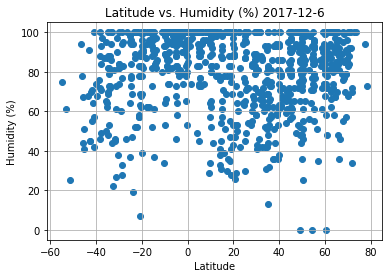

In [31]:
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
now = datetime.datetime.now()
str(now)
title="Latitude vs. Humidity (%) "+str(now.year)+"-"+str(now.month)+"-"+str(now.day)
plt.title(title)
plt.scatter(cityframe['latitude'],cityframe['humidity'])
plt.grid(True)
fig2=plt.gcf()
plt.show()
fig2.savefig('lat_vs_humidity.png')

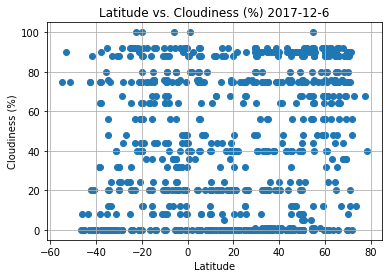

In [32]:
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
now = datetime.datetime.now()
str(now)
title="Latitude vs. Cloudiness (%) "+str(now.year)+"-"+str(now.month)+"-"+str(now.day)
plt.title(title)
plt.scatter(cityframe['latitude'],cityframe['cloudiness'])
plt.grid(True)
fig3=plt.gcf()
plt.show()
fig3.savefig('lat_vs_cloudiness.png')

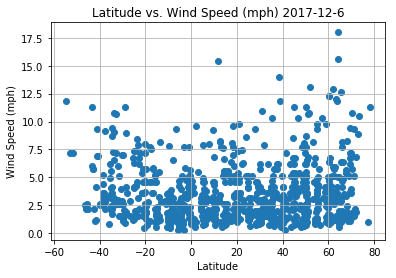

In [36]:
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
now = datetime.datetime.now()
str(now)
title="Latitude vs. Wind Speed (mph) "+str(now.year)+"-"+str(now.month)+"-"+str(now.day)
plt.title(title)
plt.scatter(cityframe['latitude'],cityframe['windspeed'])
plt.grid(True)
fig3=plt.gcf()
plt.show()
fig3.savefig('lat_vs_wind.png')